# <center> **Лекция 8:** Компьютерное зрение. Задача Optical Character Recognition (OCR). Autoencoders. </center>
----
<br>
</br>

<center> <img src=./../src/imgs/OCR_intro.png> </center>

<br>
</br>

----

## __План на сегодня:__

----

### 1. __Определение задачи Optical Character Recognition (OCR).__
### 2. __Способы решения задачи OCR.__
### 3. __Autoencoders.__


---

# Часть 1. Определение задачи Optical Character Recognition (OCR). Область применения.

---

<br>
</br>

Optical Character Recognition (OCR) задача - одна из задач в направлении распознования образов (текста, цифр, знаков и прочее) в компьютерном зрении. Цель задачи - перевести изображения рукописного/печатного текста в текстовые данные, которые далее будут использоваться для других целей анализа таких данных.

<br>
</br>

Является важной задачей, с которой вы гарантировано встретитесь в своей жизни. Решение проблемы OCR может вам в дальнейшем позволить организовать удобное взаимодействие с полученными данными - редактирование, поиск информации, анализ и определение сементики, то есть поможет решить группу задач по направлению NLP.


<br>
</br>

__Области применения OCR__:
1. Автоматический перевод документов/бланков/биллютеней в цифровой вид

<br>
</br>

<center> <img src=./../src/imgs/automatic_document_recognition.png> </center>

<br>
</br>

Примеры продуктов, использующих эту технологию: [PandaDoc](https://www.pandadoc.com/), [DocuSign](https://www.docusign.com)

<br>
</br>

2. Автоматическое распознование номерных знаков
3. Распознование пасспортных данных
4. Извлечение информации из писем, визитных карточек
5. Создание цифровых версий и рукописных документов, сканирование
6. Технологии для помощи слепым и слабовидящим

<br>
</br>

__Какие есть проблемы при решении задачи OCR которые могут усложнить решение__
1. Разнообразие почерков, форм, специфики алфавита языка, что приводит к тому, что документ может содержать несколько почерков, разнообразие форм, разные буквы (английский и немецкий, китайский и английский и тд), что приводит к усложнению задачи.
2. Искажение изображения, содержащее текст - шумы при сканировании, плохое качество изображения (размытия, обрывки и тд)
3. Различный масштаб изображений, положения форм и символов на изображении, четкость символом и тд
4. Неправильная разметка документов.

<br>
</br>

__Как правило решение задачи OCR состоит из целого пайплайна работы а не только обучения модели__
Поэтому задачу OCR считают одной из самых трудозатратных. Весь пайплайн, как правило, состоит из следующих шагов:
1. Сбор и разметка тренировочной выборки.
2. Препроцессинг изображений.
3. Тренировка модели для распознования сегментов
4. Тренировка модели для Object Detection.
5. Тренировка OCR алгоритма.
6. Пайплайн инференаса модели.
7. Создание RESTful API для поставки конечному пользователю.

<br>
</br>

<center> <img src=./../src/imgs/OCR_model_pipeline.png> </center>

<br>
</br>


__Архитектура и способ решения задачи OCR__:

<br>
</br>

__1. Решение через связку CNN + RNN:__

<br>
</br>

<center> <img src=./../src/imgs/cnn_rnn.png> </center>

<br>
</br>


Полностью архитектура выглядит следующим образом:

<br>
</br>

<center> <img src=./../src/imgs/ocr_arch.png> </center>

<br>
</br>

__2. Решение через Fully Convolutional NNs с формированием тепловых карт для каждого объекта__
__3. Использование Transformers__



<br>
</br>

Модули/фреймворки и готовые решения для упрощения решения задачи OCR:
1. [Tesseract OCR](https://github.com/tesseract-ocr/tesseract)
2. [Easy OCR](https://github.com/JaidedAI/EasyOCR)
3. [Kraken](https://github.com/mittagessen/kraken)
4. [DocTR](https://github.com/mindee/doctr)

Попробуем практически решить задачу при помощи EasyOCR:

Что необходимо:
1. __PyTorch:__
```pip install torch torchvision torchaudio torchtext```
2. __EasyOCR:__
```pip install easyocr```
3. __OpenCV:__
```pip install opencv-python```

In [58]:
# Импортируем библиотеки необходимые для решения задачи OCR
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Прочитаем картинки или видео на которых будем пробовать OCR:
image_full_path = './../data/road_signs/003.png'

# Простым методом в 2-е строчки кода EasyOCR позволяет нам опробовать OCR
ocr_reader = easyocr.Reader(lang_list=['en'], gpu=False, verbose=True)
result = ocr_reader.readtext(image_full_path)

# Посмотрим что хранится в результате:
print(result)
print(type(result))

Using CPU. Note: This module is much faster with a GPU.


[
    ([[51, 257], [421, 257], [421, 338], [51, 338]], 'Slow down', 0.9394664352070268),
    ([[0, 313], [474, 313], [474, 421], [0, 421]], 'Drive carefully', 0.8860724368398214)
]

<class 'list'>

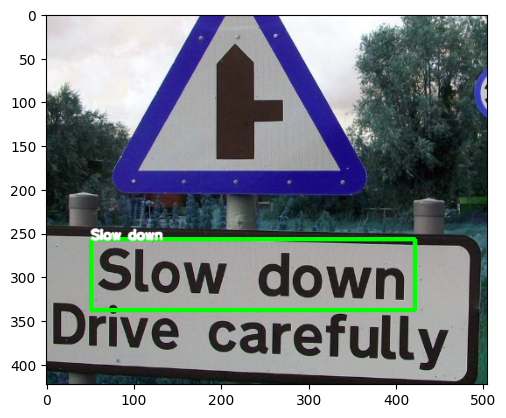

In [61]:
# Используя вывод попробуем наложить первое распознаноое слово на изображение с соответствующими координатами:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX


img = cv2.imread(image_full_path)
img = cv2.rectangle(img,top_left,bottom_right, (0,255,0), 3)
img = cv2.putText(img,text,top_left, font, 0.5, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

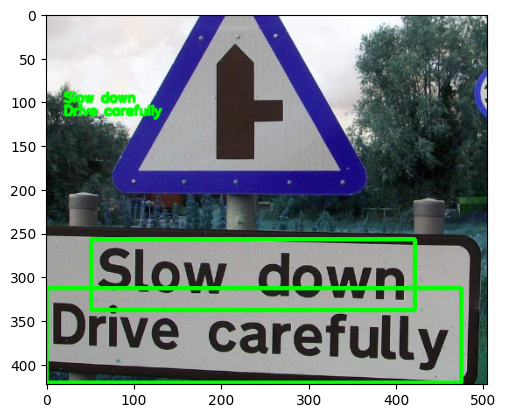

In [62]:
# И попробуем наложить все что распозналось:
img = cv2.imread(image_full_path)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()

__Практика__: ANPR (Automatic Number Plate Recognition) - Распознование номерных знаков.

Что необходимо сделать:
1. Прочитать все картинки при помощи OpenCV
2. Обнаружить рамки используя любой алгоритм Edge Detection
3. Извлечь номера на номерных знаках автомобилей


Что необходимо:
1. __PyTorch:__
```pip install torch torchvision torchaudio torchtext```
2. __EasyOCR:__
```pip install easyocr```
3. __OpenCV:__
```pip install opencv-python```
4. __IMutils:__
```pip install imutils```

In [64]:
# Импортируем библиотеки необходимые для решения задачи OCR
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

import warnings
warnings.filterwarnings('ignore')

Прочитайте любое изображение, которое находится в папке с номерами для автомобилей и __примените перевод в GrayScale и Blur:__

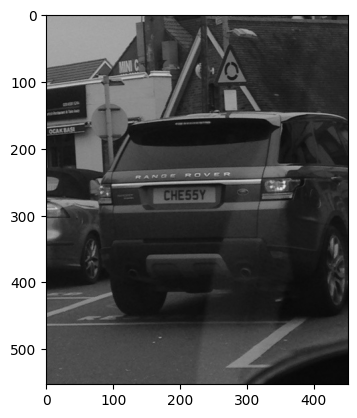

In [65]:
img = cv2.imread('./../data/car_numbers/004.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

Примените фильтр и попробуйте найти границы объекта для целей локализации:

Hints:
1. _`cv2.bilateralFilter()`_ - для удаления шума.
2. _`cv2.Canny()`_ - для нахождения границ объектов на изображении

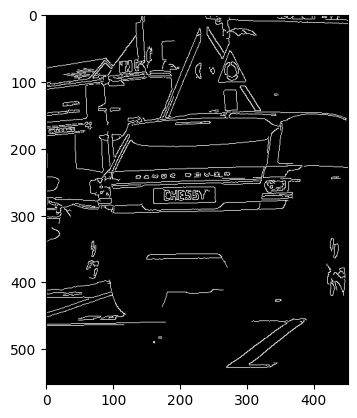

In [66]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200)             #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

Найдите контуры и примените маску:

Hints:
1. _`cv2.findCountours()`_
2. _`imutils.grab_countours()`_
3. используйте `sorted()` для упорядочивания значений

In [67]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

Попробуем найти локализацию номера (если получится):

In [70]:
location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [71]:
location

array([[[160, 261]],

       [[161, 283]],

       [[253, 280]],

       [[250, 258]]], dtype=int32)

Сформируйте маску по найденно локализации:

In [72]:
mask = np.zeros(gray.shape, np.uint8)

new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

Визуализируйте найденный номер по маске:

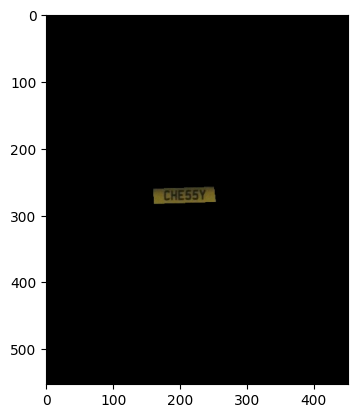

In [73]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

Обрежим найденный нормер для упрощения OCR (чтобы не брать все признаковое пространство):

In [74]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

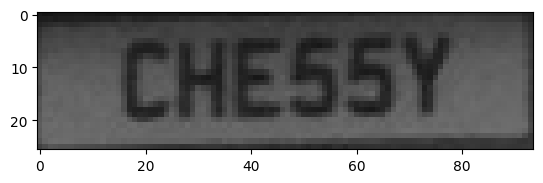

In [75]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Воспользуйтесь OCR из easyOCR для того чтобы перевести номер в текст:

In [76]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[12, 0], [82, 0], [82, 24], [12, 24]], 'chesSY', 0.3315062852185557)]

Правильно ли получилось распознать номер? Визуализируйте результат распознования на основном изображении:

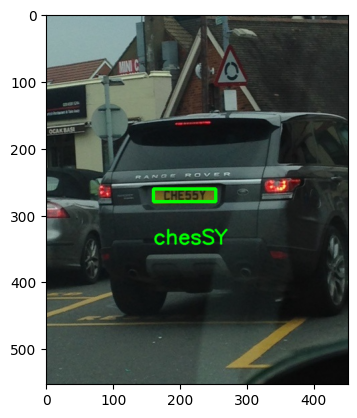

In [77]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

---

## Часть 2: Autoencoders

---

### Понятие Автоэнкодера:


<br>
</br>

Представим ситуацию - необходимо кластеризовать изображения на основе их сходства, но никаких меток для нашего набора изображений нет. Но для идентификации и группировки похожих изображений нам могут помочь автоэнкодеры (и во многом другом как мы увидим дальше). 

<br>
</br>

В случае работы с обработкой изображений и компьютерным зрением, работа автоэнкодера довольно примитивна. Автоэнкодер принимает на вход изображение, обрабатывает его сохраняя его в более низком разрешении и пытается "реконструировать" его при помощи полученных признаков обратно в исходное разрешение. 

Отличительной особенностью автоэнкодера является то, что он кодирует информацию, содержащуюся в изображении (или любых других данных), в более низком измерении, а затем воспроизводит это изображение заново, отсюда и термин "энкодер" (процесс сжатия и представления информации в более низком измерении). Таким образом, похожие изображения будут иметь одинаковый энкодинг (то есть одинаковые вектор (-а). Далее затем декодер работает над восстановлением исходного изображения из закодированного вектора.

<img src="./../src/imgs/autoencoder.png
">


Благодаря bottleneck мы можем представить изображение в гораздо меньшей размерности. Кроме того, с помощью bottleneck мы можем восстановить исходное изображение. С помощью bottleneck решаются задачи идентификации похожих изображений, а также генерации новых изображений, сжатия данных, задачи определения важности признаков, задачи понижения размерности и т.д.

<br>
</br>

В случае идентификации похожих изображений то bottleneck будет участвовать в следующей логике:
1. Изображения, значения векторов которых в данном слое схожи (внимание тут не одинаковы а схожи!) с большей вероятностью будут очень похожи по каким-то характеристикам
2. Изменяя значения узлов bottleneck, мы можем изменять выходное изображение и данных.

<br>
</br>

### Реализуем простой автоэнкодер и попробуем посравнивать картинки:


In [78]:
# Импорт всех необходимых библиотек
from torch_snippets import *
from torchvision.datasets import MNIST
from torchvision import transforms
import torch

import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [79]:
# Определим трансформации которые мы будем применять на наши изображеня
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5]),
    transforms.Lambda(lambda x: x.to(device))
])

In [80]:
# Загружаем данные для тренировки и для валидаци
trn_ds = MNIST('./mnist/', transform=img_transform, train=True, download=True)
val_ds = MNIST('./mnist/', transform=img_transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 57107140.15it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25740691.42it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31226369.43it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6015323.26it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [81]:
# Определим даталоудеры 
from torch.utils.data import DataLoader, Dataset

batch_size = 512 

train_dl = DataLoader(trn_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False)


In [82]:
# Определим простейшую архитектуру автоэнкодера
import torch.nn as nn

class AutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latend_dim = latent_dim
        self.encoder = nn.Sequential(
                            nn.Linear(28 * 28, 128), 
                            nn.ReLU(True),
                            nn.Linear(128, 64), 
                            nn.ReLU(True), 
                            nn.Linear(64, latent_dim))
        self.decoder = nn.Sequential(
                            nn.Linear(latent_dim, 64), 
                            nn.ReLU(True),
                            nn.Linear(64, 128), 
                            nn.ReLU(True), 
                            nn.Linear(128, 28 * 28), 
                            nn.Tanh())

    def forward(self, x):
        x = x.view(len(x), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(len(x), 1, 28, 28)
        return x

In [83]:
from torchsummary import summary

model = AutoEncoder(3)
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                    [-1, 3]             195
            Linear-6                   [-1, 64]             256
              ReLU-7                   [-1, 64]               0
            Linear-8                  [-1, 128]           8,320
              ReLU-9                  [-1, 128]               0
           Linear-10                  [-1, 784]         101,136
             Tanh-11                  [-1, 784]               0
Total params: 218,643
Trainable params: 218,643
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [84]:
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

In [85]:
@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

In [86]:
model = AutoEncoder(3).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [87]:
num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(train_dl)
    for ix, (data, _) in enumerate(train_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N),trn_loss=loss, end='\r')
        
    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        
    log.report_avgs(epoch+1)

EPOCH: 1.000  trn_loss: 0.313  val_loss: 0.234  (11.47s - 45.87s remaining)
EPOCH: 2.000  trn_loss: 0.210  val_loss: 0.196  (22.52s - 33.78s remaining)
EPOCH: 3.000  trn_loss: 0.184  val_loss: 0.175  (33.64s - 22.43s remaining)
EPOCH: 4.000  trn_loss: 0.168  val_loss: 0.163  (44.86s - 11.21s remaining)
EPOCH: 5.000  trn_loss: 0.159  val_loss: 0.156  (56.00s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 6515.85it/s]


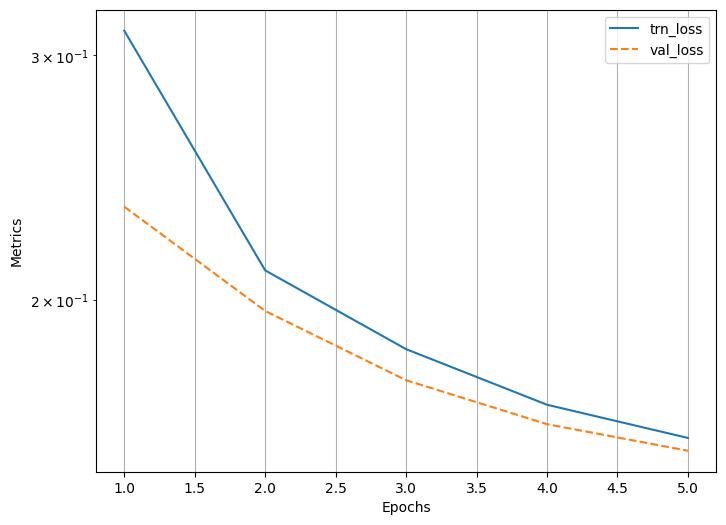

In [88]:
log.plot_epochs(log=True)

Окей обучили авктоэнкодер, давайте проверим его на предмет восстановления изображений (выполним предсказание):

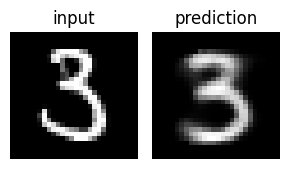

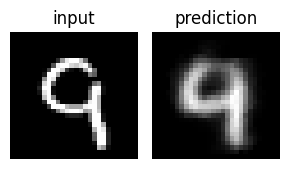

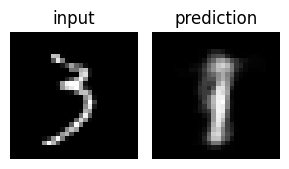

In [89]:
for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

Мы видим, что автоэнкодер способен воспроизвести входные данные с очень высокой точностью, несмотря на то, что выход боттлнека составляет всего три нейрона. Однако изображения получаются не такими четкими, как хотелось бы. В первую очередь это связано с малым количеством нейронов в боттлнеке. Попробуем обучить автоэнкодер с различным количеством выходных нейронов 

In [90]:
def train_aec(latent_dim):
    model = AutoEncoder(latent_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

    num_epochs = 5
    log = Report(num_epochs)

    for epoch in range(num_epochs):
        N = len(train_dl)
        for ix, (data, _) in enumerate(train_dl):
            loss = train_batch(data, model, criterion, optimizer)
            log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')

        N = len(val_dl)
        for ix, (data, _) in enumerate(val_dl):
            loss = validate_batch(data, model, criterion)
            log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        log.report_avgs(epoch+1)
    log.plot(log=True)
    return model

EPOCH: 1.000  trn_loss: 0.306  val_loss: 0.206  (11.57s - 46.30s remaining)
EPOCH: 2.000  trn_loss: 0.168  val_loss: 0.139  (22.61s - 33.92s remaining)
EPOCH: 3.000  trn_loss: 0.124  val_loss: 0.113  (33.65s - 22.43s remaining)
EPOCH: 4.000  trn_loss: 0.106  val_loss: 0.098  (44.74s - 11.19s remaining)
EPOCH: 5.000  trn_loss: 0.094  val_loss: 0.088  (56.02s - 0.00s remaining)


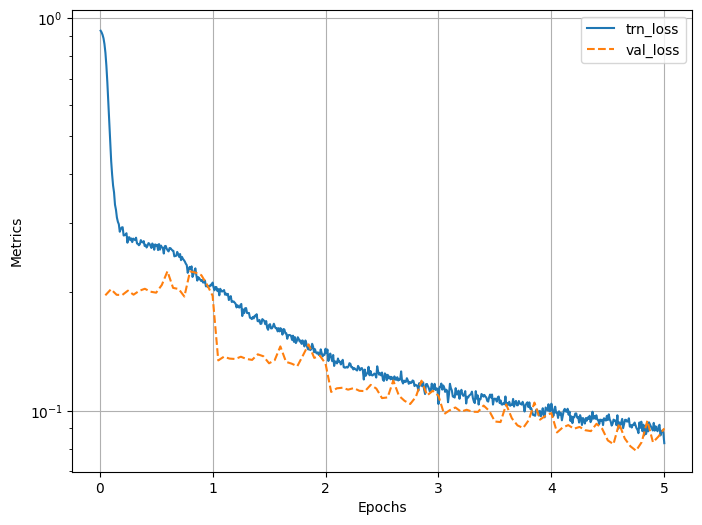

EPOCH: 1.000  trn_loss: 0.307  val_loss: 0.233  (11.62s - 46.49s remaining)
EPOCH: 2.000  trn_loss: 0.220  val_loss: 0.208  (22.76s - 34.14s remaining)
EPOCH: 3.000  trn_loss: 0.199  val_loss: 0.193  (34.16s - 22.77s remaining)
EPOCH: 4.000  trn_loss: 0.188  val_loss: 0.185  (45.29s - 11.32s remaining)
EPOCH: 5.000  trn_loss: 0.182  val_loss: 0.180  (56.63s - 0.00s remaining)


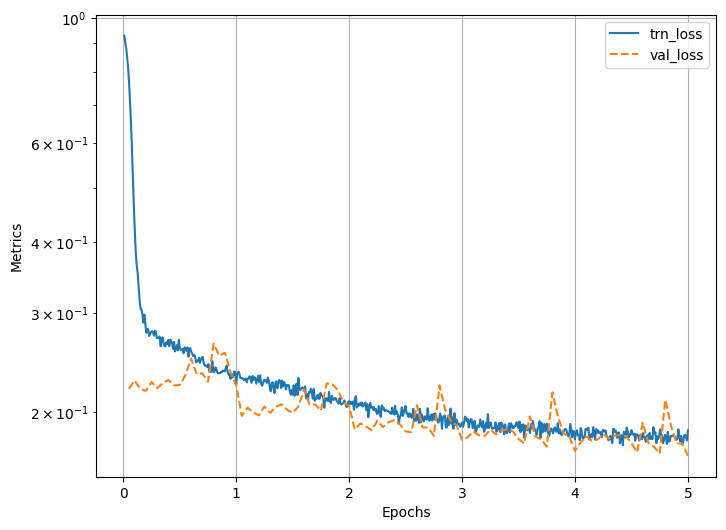

EPOCH: 1.000  trn_loss: 0.307  val_loss: 0.219  (12.38s - 49.51s remaining)
EPOCH: 2.000  trn_loss: 0.199  val_loss: 0.184  (23.53s - 35.30s remaining)
EPOCH: 3.000  trn_loss: 0.172  val_loss: 0.165  (34.56s - 23.04s remaining)
EPOCH: 4.000  trn_loss: 0.161  val_loss: 0.157  (45.60s - 11.40s remaining)
EPOCH: 5.000  trn_loss: 0.155  val_loss: 0.153  (56.75s - 0.00s remaining)


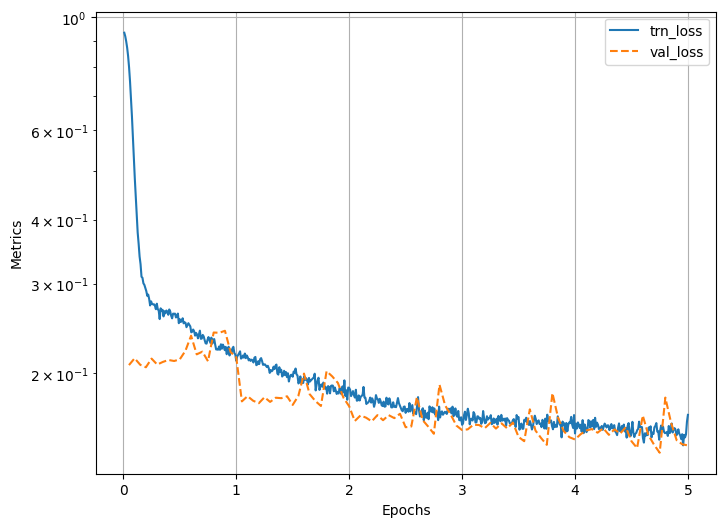

EPOCH: 1.000  trn_loss: 0.306  val_loss: 0.208  (12.71s - 50.84s remaining)
EPOCH: 2.000  trn_loss: 0.179  val_loss: 0.158  (24.01s - 36.01s remaining)
EPOCH: 3.000  trn_loss: 0.145  val_loss: 0.136  (35.05s - 23.36s remaining)
EPOCH: 4.000  trn_loss: 0.131  val_loss: 0.127  (48.39s - 12.10s remaining)
EPOCH: 5.000  trn_loss: 0.125  val_loss: 0.123  (64.60s - 0.00s remaining)


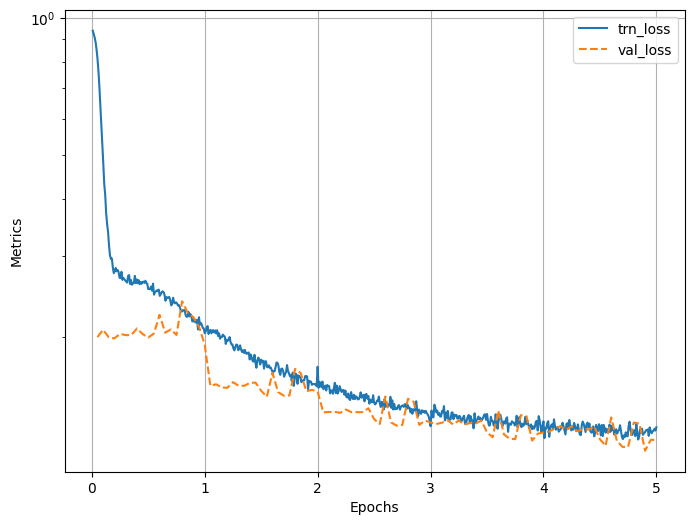

EPOCH: 1.000  trn_loss: 0.299  val_loss: 0.201  (16.48s - 65.93s remaining)
EPOCH: 2.000  trn_loss: 0.163  val_loss: 0.143  (32.66s - 48.99s remaining)
EPOCH: 3.000  trn_loss: 0.130  val_loss: 0.119  (49.08s - 32.72s remaining)
EPOCH: 4.000  trn_loss: 0.112  val_loss: 0.105  (65.59s - 16.40s remaining)
EPOCH: 5.000  trn_loss: 0.103  val_loss: 0.099  (82.42s - 0.00s remaining)


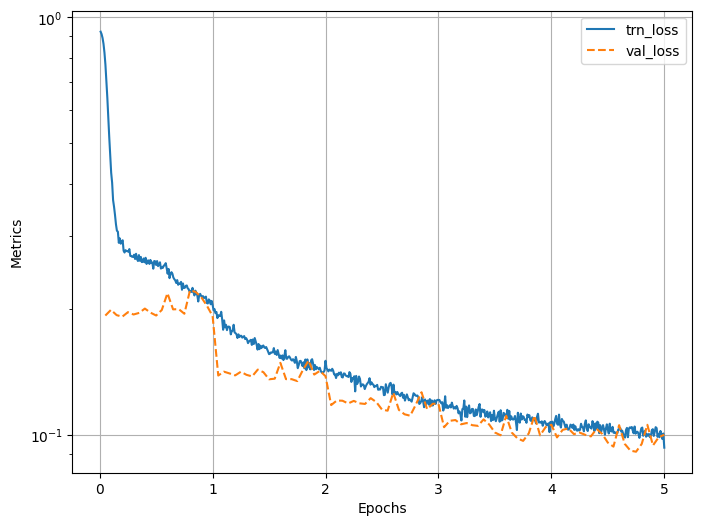

In [91]:
aecs = [train_aec(dim) for dim in [50, 2, 3, 5, 10]]

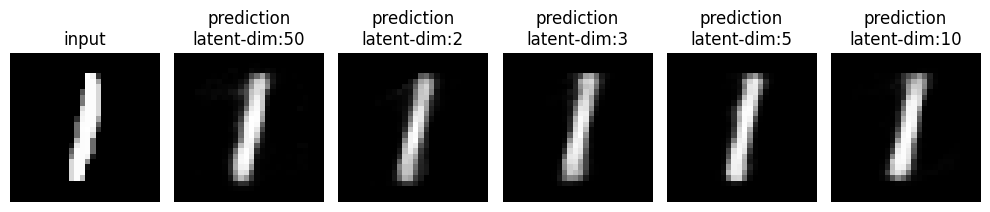

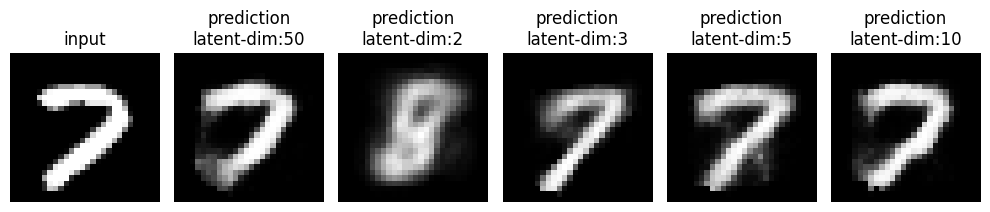

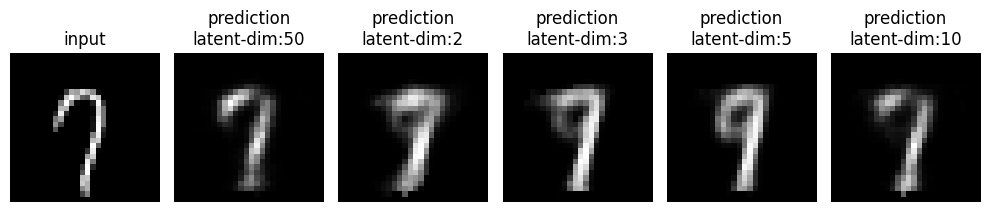

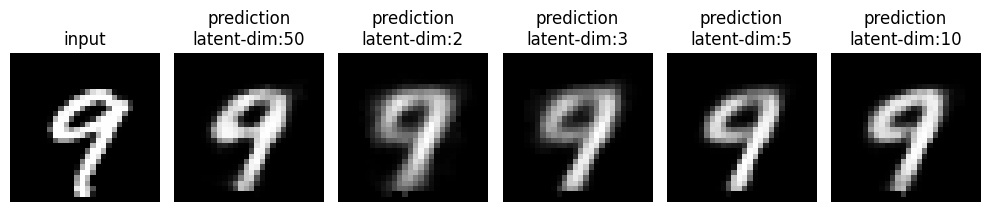

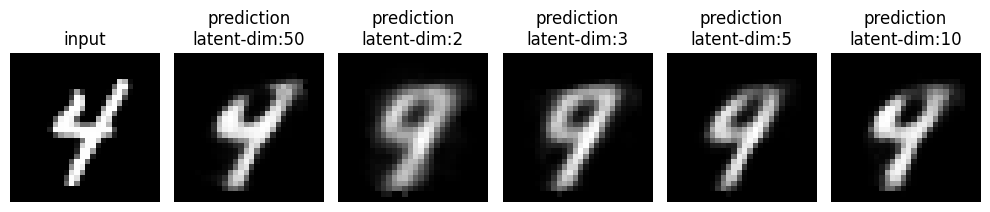

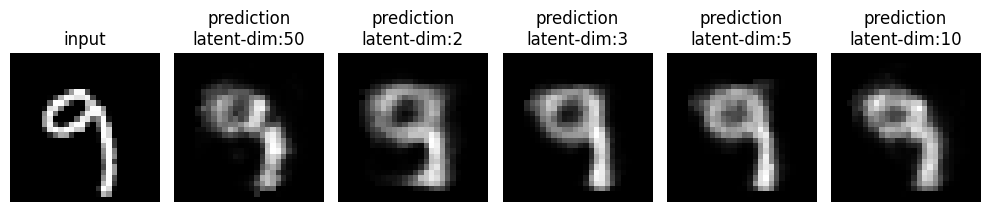

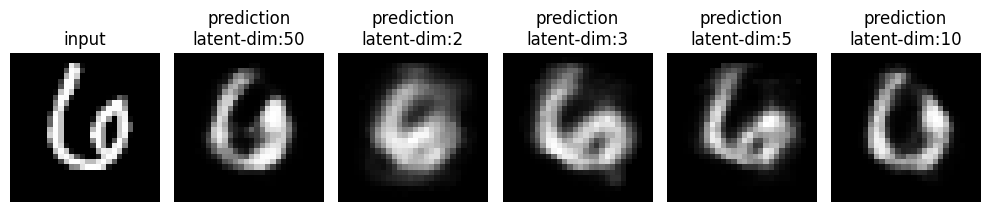

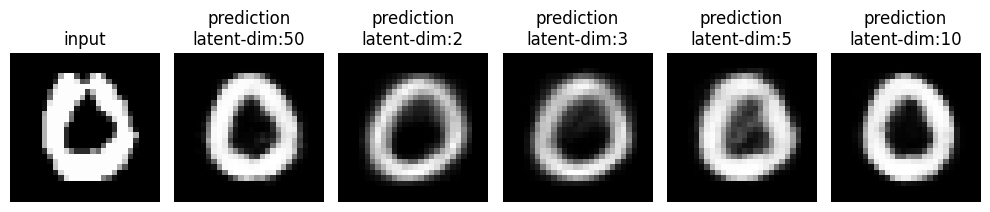

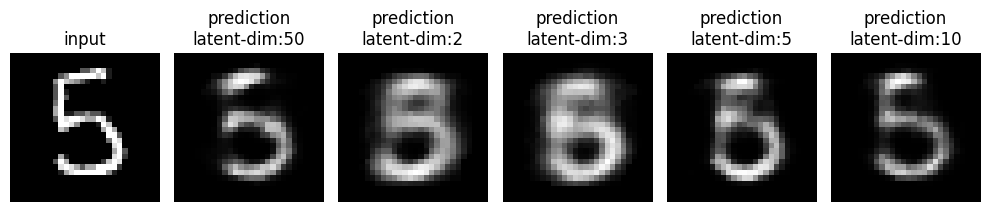

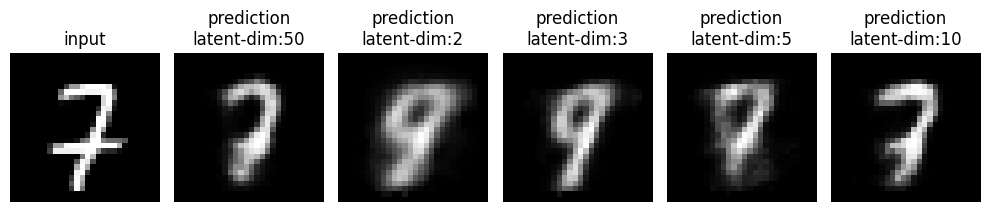

In [92]:
for _ in range(10):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    fig, ax = plt.subplots(1, len(aecs)+1, figsize=(10,4))
    ax = iter(ax.flat)
    show(im[0], ax=next(ax), title='input')
    for model in aecs:
        _im = model(im[None])[0]
        show(_im[0], ax=next(ax), title=f'prediction\nlatent-dim:{model.latend_dim}')
    plt.tight_layout()
    plt.show()

### Сверточный Автоэнкодер. Что это и как работает:


<br>
</br>

При реализации автоэнкодера мы столкнулись с одним удобством: каждое изображение имеет только один канал (каждое изображение было представлено как черно-белое), а сами изображения относительно малы (28 x 28). Таким образом, сеть "сплющила" входные данные и смогла обучиться на 784 (28*28) элементах входных значений, чтобы предсказать 784 выходных значения. Однако в реальности мы сталкиваемся с изображениями, имеющими 3 канала и гораздо большие размеры, чем 28 x 28, а иногда даже и больше чем 3 канала (мед задачи, КТ, космические снимики и т.д.).

<br>
</br>

Что делать в таком случае?

<br>
</br>

Как уже понятно из названия подтемы, на помощь нам приходят сверточные нейронные сети. Автоэнкодер построенные при помощи сверточных блоков выглядит следующим образом:

<br>
</br>

<img src="./../src/imgs/convAutoencoder.png">


In [93]:
class ConvAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, stride=3, padding=1), 
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(32, 64, 3, stride=2, padding=1), 
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3, stride=2), 
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 16, 5, stride=3, padding=1), 
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2, padding=1),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [94]:
model = ConvAutoEncoder().to(device)

In [95]:
def train_batch(input, model, criterion, optimizer):
    model.train()
    optimizer.zero_grad()
    output = model(input)
    loss = criterion(output, input)
    loss.backward()
    optimizer.step()
    return loss

In [96]:
@torch.no_grad()
def validate_batch(input, model, criterion):
    model.eval()
    output = model(input)
    loss = criterion(output, input)
    return loss

In [97]:
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)

In [98]:
num_epochs = 5
log = Report(num_epochs)

for epoch in range(num_epochs):
    N = len(train_dl)
    for ix, (data, _) in enumerate(train_dl):
        loss = train_batch(data, model, criterion, optimizer)
        log.record(pos=(epoch + (ix+1)/N), trn_loss=loss, end='\r')
        
    N = len(val_dl)
    for ix, (data, _) in enumerate(val_dl):
        loss = validate_batch(data, model, criterion)
        log.record(pos=(epoch + (ix+1)/N), val_loss=loss, end='\r')
        
    log.report_avgs(epoch+1)

EPOCH: 1.000  trn_loss: 0.284  val_loss: 0.184  (24.21s - 96.85s remaining)
EPOCH: 2.000  trn_loss: 0.156  val_loss: 0.136  (48.18s - 72.28s remaining)
EPOCH: 3.000  trn_loss: 0.124  val_loss: 0.113  (72.10s - 48.07s remaining)
EPOCH: 4.000  trn_loss: 0.109  val_loss: 0.103  (95.84s - 23.96s remaining)
EPOCH: 5.000  trn_loss: 0.100  val_loss: 0.095  (119.33s - 0.00s remaining)


100%|██████████| 106/106 [00:00<00:00, 6017.33it/s]


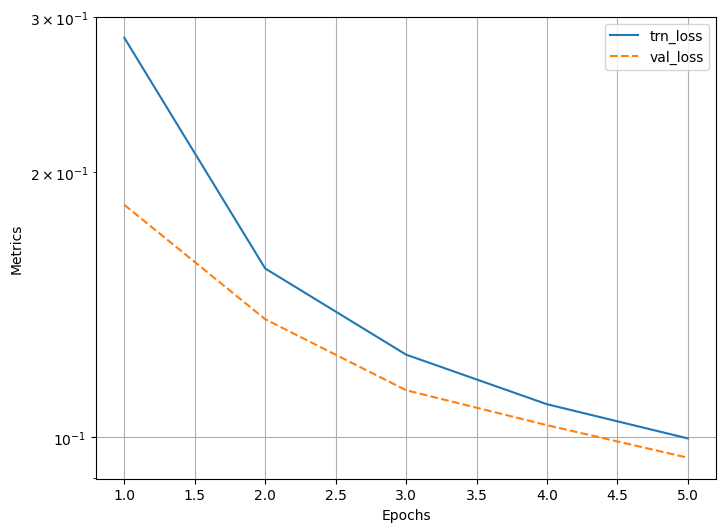

In [99]:
log.plot_epochs(log=True)

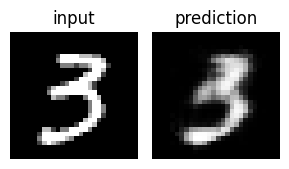

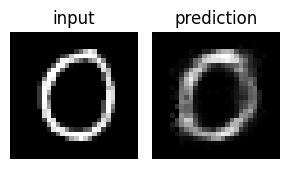

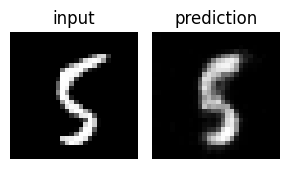

In [100]:
for _ in range(3):
    ix = np.random.randint(len(val_ds))
    im, _ = val_ds[ix]
    _im = model(im[None])[0]
    fig, ax = plt.subplots(1, 2, figsize=(3,3))
    show(im[0], ax=ax[0], title='input')
    show(_im[0], ax=ax[1], title='prediction')
    plt.tight_layout()
    plt.show()

### Визуализация того, что происходит в боттлнеке

Построим векторы эмбеддингов в двумерном пространстве. Мы можем свести 64-мерный вектор сверточного автоэнкодера к 2-мерному пространству с помощью техники t-SNE:

In [101]:
latent_vectors = []
classes = []

In [102]:
for im, clss in val_dl:
    latent_vectors.append(model.encoder(im).view(len(im),-1))
    classes.extend(clss)

In [103]:
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy()

In [104]:
from sklearn.manifold import TSNE
tsne = TSNE(2)

In [105]:
clustered = tsne.fit_transform(latent_vectors)

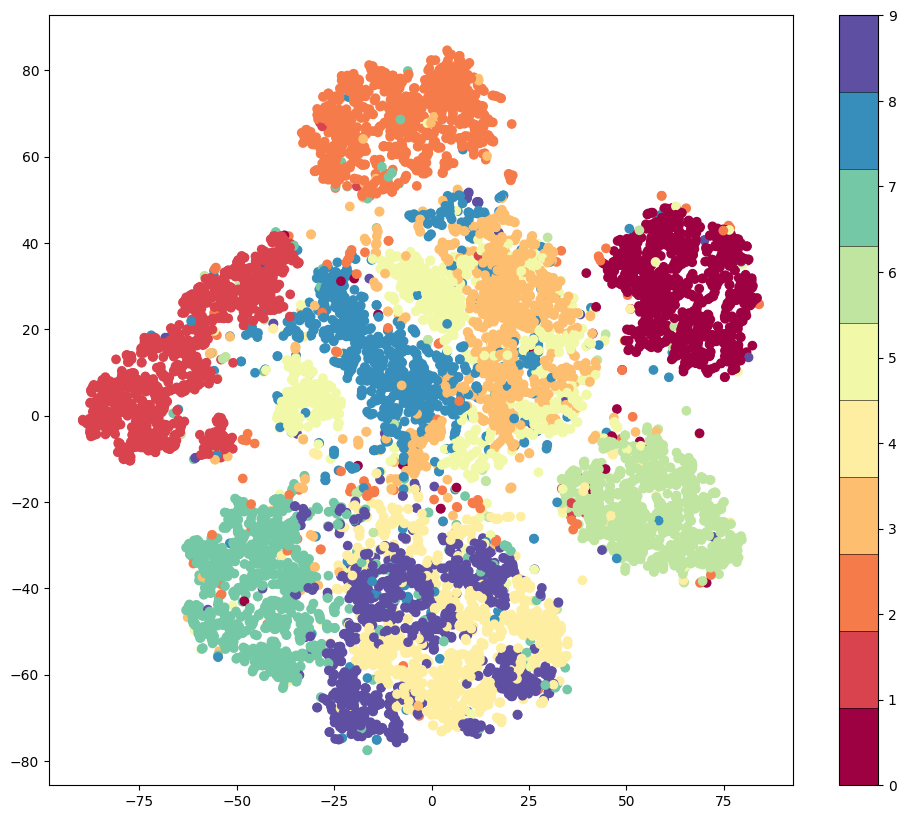

In [106]:
fig = plt.figure(figsize=(12,10))
cmap = plt.get_cmap('Spectral', 10)
plt.scatter(*zip(*clustered), c=classes, cmap=cmap)
plt.colorbar(drawedges=True)

## Вариационный Автоэнкодер (Variational Autoencoder)

<br>
</br>

Окей, мы научились группировать и искать похожие изображения при помощи обычного и сверточного автоэнкодера. Но достаточно ли нам этого? Что нам делать если эмбеддинг (он же латентный вектор) будет похож на 2 кластера в нашем пространстве? Нет никакой гарантии что на выходе мы получим именно тот класс (тот объект) который хотим, так как велика вероятность "спутанности" таких эмбеддингов. 


Тут напомощь приходит немного новый метод, который называется Вариационным Автоэнкодером. 

<br>
</br>

Прежде чем перейти к построению вариационного автоэнкодера, рассмотрим возможности генерации изображений из эмбеддингов, которые не попадают в какой-либо кластер (или находятся в середине разных кластеров в пространстве). Сначала мы генерируем изображения путем выборки векторов:

In [107]:
# Calculate the latent vectors (embeddings) of the validation images

latent_vectors = []
classes = []

for im,clss in val_dl:
    latent_vectors.append(model.encoder(im))
    classes.extend(clss)
    
    
latent_vectors = torch.cat(latent_vectors).cpu().detach().numpy().reshape(10000, -1)

Сгенерируем случайные вектора со средним по столбцу (mu) и со стандартным отклонением (sigma) и добавим немного шума к стандратному отклонению (torch.randn(1,100)) прежде чем создать вектор используя среднее и стандартное отклонение. В конце сохраним все в список (rand_vectors):

In [108]:
rand_vectors = []

for col in latent_vectors.transpose(1,0):
    mu, sigma = col.mean(), col.std()
    rand_vectors.append(sigma*torch.randn(1,100) + mu)

Теперь визуализируем полученный результат


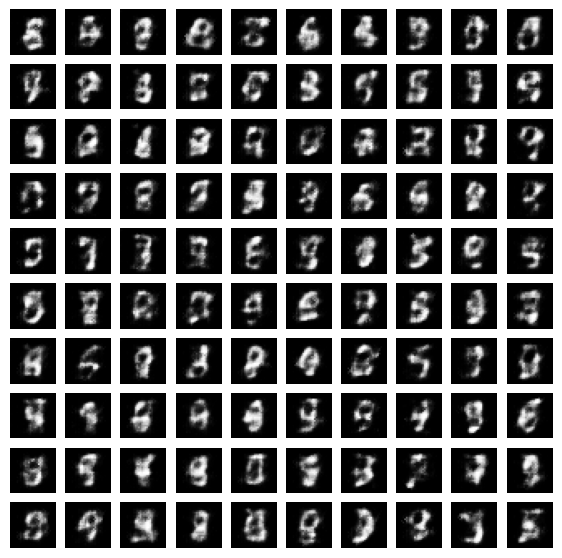

In [109]:
rand_vectors=torch.cat(rand_vectors).transpose(1,0).to(device)
fig,ax = plt.subplots(10,10,figsize=(7,7)); ax = iter(ax.flat)
for p in rand_vectors:
    img = model.decoder(p.reshape(1,64,2,2)).view(28,28)
    show(img, ax=next(ax))

видно, что при построении изображений, полученных по среднему значению и среднеквадратичному отклонению столбцов известных векторов с добавлением шума, мы получили изображения менее четкие, чем раньше. Это вполне реалистичный сценарий, так как мы не можем заранее знать диапазон векторов эмбеддингов, при котором получаются реалистичные изображения.


Вариационные автоэнкодеры помогают решить эту проблему, генерируя векторы, среднее значение которых равно 0, а стандартное отклонение равно 1, тем самым гарантируя, что мы получим изображения, среднее значение которых равно 0, а стандартное отклонение равно 1. По сути, в VAE мы указываем, что слой боттлнека должен следовать определенному распределению. 




#### Логика Вариационного автоэнкодера


В VAE мы строим сеть таким образом, чтобы случайный вектор, сгенерированный из заранее заданного распределения, мог генерировать реалистичное изображение. Это невозможно при использовании простого автоэнкодера, так как мы не задаем распределение данных, генерирующих изображение в сети. С помощью VAE это стало возможным благодаря следующей стратегии:

1. На выходе из энкодера мы получаем два вектора для каждого изображения. Один вектор предтавляет среднее значение. Второй вектор представляет стандартное отклонение.
2. Из этих двух векторов мы получаем комбинированный вектор, представляющий собой сумму среднего и стандартного отклонения (которое умножается на случайное небольшое число). Модифицированный вектор будет иметь ту же размерность, что и каждый из векторов.
3. Модифицированный вектор, полученный на предыдущем шаге, передается на вход декодера для извлечения изображения.
4. Значение потерь, которое мы оптимизируем, представляет собой комбинацию средней квадратичной ошибки и потерь по расхождению KL. Потери по КL измеряют отклонение распределения среднего вектора и вектора стандартного отклонения от 0 и 1.

In [110]:
from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [111]:
train_dataset = datasets.MNIST(root='./mnist', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist', train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [112]:
class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        """
        x_dim: Размерность входных данных
        h_dim1: Размерность первого скрытого слоя
        h_dim2: Размерность второго скрытого слоя
        z_dim: Размерность латентного пространства
        """
        super(VAE, self).__init__()
        # Слои вариационного автоэнкодера
        self.d1 = nn.Linear(x_dim, h_dim1)
        self.d2 = nn.Linear(h_dim1, h_dim2)
        self.d31 = nn.Linear(h_dim2, z_dim)
        
        self.d32 = nn.Linear(h_dim2, z_dim)
        self.d4 = nn.Linear(z_dim, h_dim2)
        self.d5 = nn.Linear(h_dim2, h_dim1)
        self.d6 = nn.Linear(h_dim1, x_dim)
    
    def encoder(self, x):
        h = F.relu(self.d1(x))
        h = F.relu(self.d2(h))
        return self.d31(h), self.d32(h)
    
    def sampling(self, mean, log_var):
        # метод используется для выборки из латентного пространства.
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mean)
    
    def decoder(self, z):
        # Декодер восстанавливает входные данные из латентного представления z
        h = F.relu(self.d4(z))
        h = F.relu(self.d5(h))
        return F.sigmoid(self.d6(h))
    
    def forward(self, x):
        mean, log_var = self.encoder(x.view(-1, 784))
        z = self.sampling(mean, log_var)
        return self.decoder(z), mean, log_var


In [113]:
def train_batch(data, model, optimizer, loss_function):
    model.train()
    data = data.to(device)
    optimizer.zero_grad()
    recon_batch, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon_batch, data, mean, log_var)
    loss.backward()
    optimizer.step()
    return loss, mse, kld, log_var.mean(), mean.mean()

@torch.no_grad()
def validate_batch(data, model, loss_function):
    model.eval()
    data = data.to(device)
    recon, mean, log_var = model(data)
    loss, mse, kld = loss_function(recon, data, mean, log_var)
    return loss, mse, kld, log_var.mean(), mean.mean()

In [114]:
def loss_function(recon_x, x, mean, log_var):
    RECON = F.mse_loss(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return RECON + KLD, RECON, KLD

In [115]:
vae = VAE(x_dim=784, h_dim1=512, h_dim2=256, z_dim=50).to(device)
optimizer = optim.AdamW(vae.parameters(), lr=1e-3)

EPOCH: 1.000  val_mean: -0.016  train_kld: 264.951  train_mean: -0.002  val_kld: 420.642  val_recon: 1921.523  val_log_var: -0.263  train_loss: 2893.031  train_recon: 2628.080  val_loss: 2342.165  train_log_var: -0.159  (18.18s - 163.64s remaining)


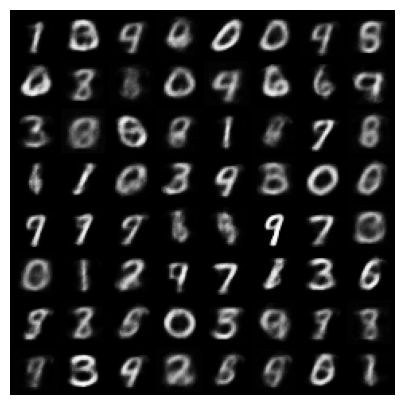

EPOCH: 2.000  val_mean: -0.006  train_kld: 490.276  train_mean: -0.001  val_kld: 519.821  val_recon: 1583.139  val_log_var: -0.321  train_loss: 2207.015  train_recon: 1716.740  val_loss: 2102.960  train_log_var: -0.299  (38.49s - 153.98s remaining)


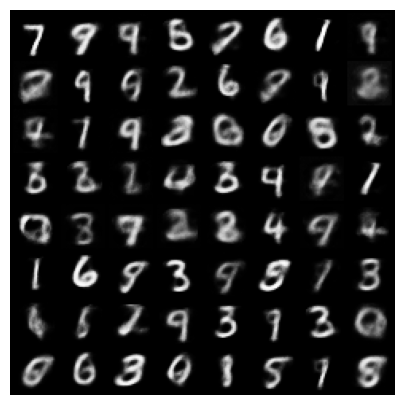

EPOCH: 3.000  val_mean: -0.002  train_kld: 541.795  train_mean: -0.000  val_kld: 572.344  val_recon: 1432.332  val_log_var: -0.358  train_loss: 2067.405  train_recon: 1525.610  val_loss: 2004.676  train_log_var: -0.333  (58.98s - 137.62s remaining)


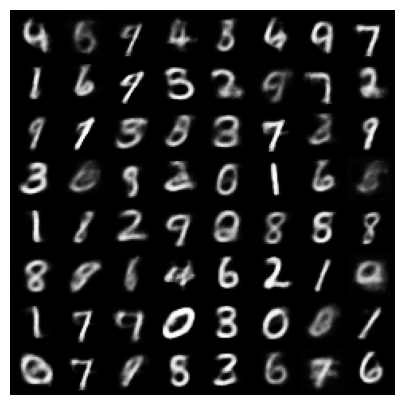

EPOCH: 4.000  val_mean: -0.005  train_kld: 570.911  train_mean: 0.000  val_kld: 574.534  val_recon: 1373.574  val_log_var: -0.355  train_loss: 1995.739  train_recon: 1424.828  val_loss: 1948.108  train_log_var: -0.353  (79.09s - 118.63s remaining)


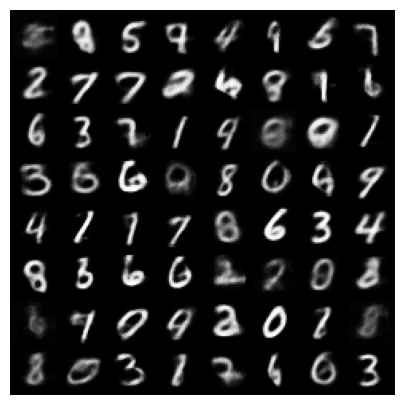

EPOCH: 5.000  val_mean: -0.004  train_kld: 586.782  train_mean: -0.000  val_kld: 616.521  val_recon: 1316.462  val_log_var: -0.379  train_loss: 1953.447  train_recon: 1366.665  val_loss: 1932.984  train_log_var: -0.363  (99.23s - 99.23s remaining)


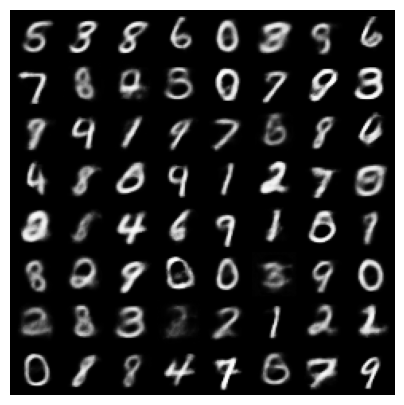

EPOCH: 6.000  val_mean: -0.004  train_kld: 598.879  train_mean: -0.000  val_kld: 608.247  val_recon: 1290.133  val_log_var: -0.383  train_loss: 1924.422  train_recon: 1325.542  val_loss: 1898.380  train_log_var: -0.372  (119.55s - 79.70s remaining)


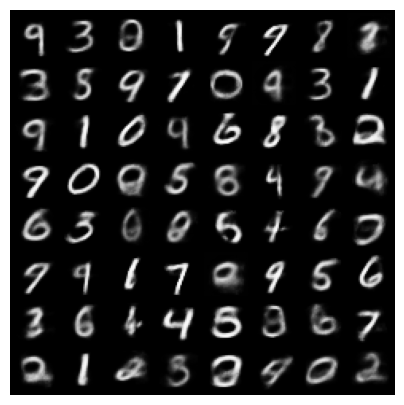

EPOCH: 7.000  val_mean: -0.003  train_kld: 607.015  train_mean: -0.000  val_kld: 601.405  val_recon: 1273.735  val_log_var: -0.375  train_loss: 1900.235  train_recon: 1293.220  val_loss: 1875.140  train_log_var: -0.377  (139.57s - 59.82s remaining)


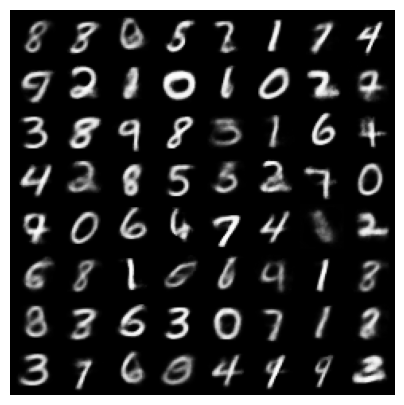

EPOCH: 8.000  val_mean: -0.008  train_kld: 614.642  train_mean: -0.000  val_kld: 632.410  val_recon: 1228.878  val_log_var: -0.394  train_loss: 1882.887  train_recon: 1268.245  val_loss: 1861.288  train_log_var: -0.382  (157.43s - 39.36s remaining)


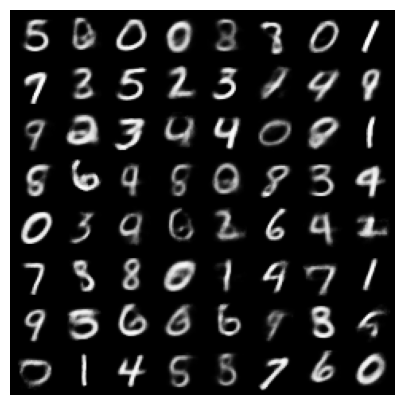

EPOCH: 9.000  val_mean: -0.001  train_kld: 621.682  train_mean: -0.001  val_kld: 629.208  val_recon: 1231.151  val_log_var: -0.397  train_loss: 1868.701  train_recon: 1247.020  val_loss: 1860.359  train_log_var: -0.387  (174.83s - 19.43s remaining)


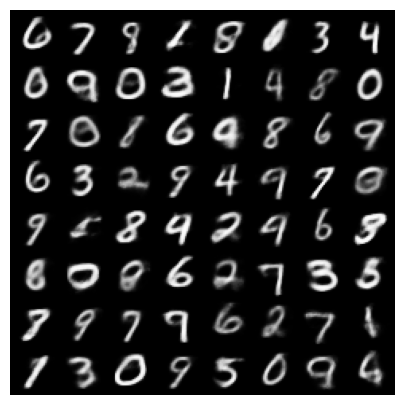

EPOCH: 10.000  val_mean: -0.001  train_kld: 624.901  train_mean: -0.000  val_kld: 611.924  val_recon: 1234.620  val_log_var: -0.385  train_loss: 1855.479  train_recon: 1230.578  val_loss: 1846.545  train_log_var: -0.389  (192.06s - 0.00s remaining)


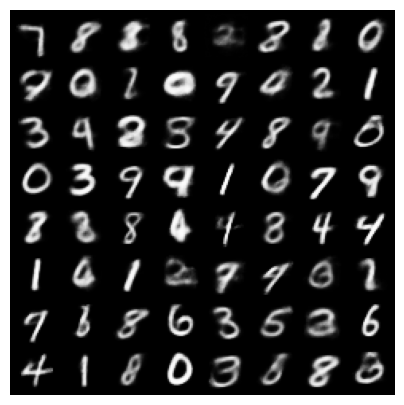

In [116]:
n_epochs = 10
log = Report(n_epochs)

for epoch in range(n_epochs):
    N = len(train_loader)
    for batch_idx, (data, _) in enumerate(train_loader):
        loss, recon, kld, log_var, mean = train_batch(data, vae, optimizer, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')
        
    N = len(test_loader)
    for batch_idx, (data, _) in enumerate(test_loader):
        loss, recon, kld, log_var, mean = validate_batch(data, vae, loss_function)
        pos = epoch + (1+batch_idx)/N
        log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')
        
    log.report_avgs(epoch+1)
    with torch.no_grad():
        z = torch.randn(64, 50).to(device)
        sample = vae.decoder(z).to(device)
        images = make_grid(sample.view(64, 1, 28, 28)).permute(1,2,0)
        show(images)

100%|██████████| 111/111 [00:00<00:00, 375.14it/s]


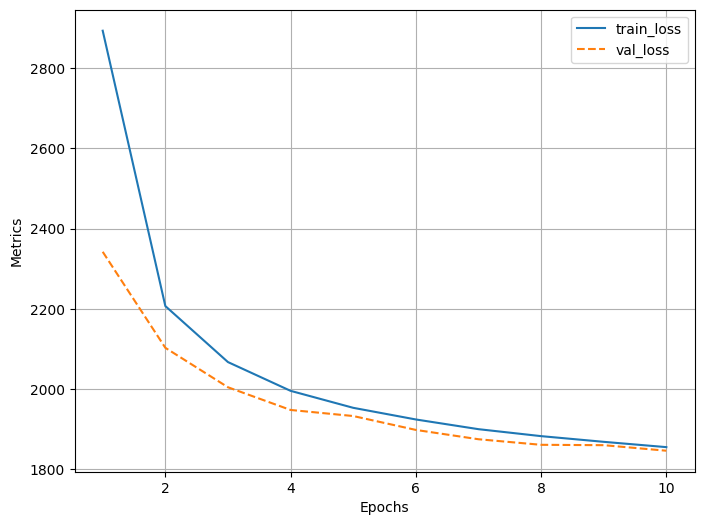

In [117]:
log.plot_epochs(['train_loss','val_loss'])